<a href="https://colab.research.google.com/github/msommerfe/CAS-Applied-Data-Science/blob/master/Module6_Deep_Learning/Object_DetectionV8_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 7.5 MB/s eta 0:00:00


In [4]:
import ssl
import urllib
import os
import time
from matplotlib import pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO
from ultralytics.utils.plotting import plot_results
print(os.getcwd())

/content


In [4]:
!nvidia-smi

Fri Mar  8 15:02:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              41W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
#!python train.py --img 1280 --batch 16 --epochs 500 --data /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1200x900/YoloTrainingPath.yaml --weights yolov5s.pt
yamlPath = '/content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/YoloTrainingPath.yaml'
model = YOLO('yolov8n.pt')

results = model.train(data = yamlPath, epochs = 500, imgsz=1280)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!cp -av "/content/runs" "/content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960"

In [ ]:
resultPath = '/content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/runs/detect/train2/results'
#plot_results(resultPath + '.csv') #Creating a image (result.png) based on data in result.csv

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(resultPath + '.png')
plt.imshow(img)
plt.show()

In [5]:
pathBestWeights = '/content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/runs/detect/train/weights/best.pt'
model = YOLO(pathBestWeights)

In [6]:
img = '/content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/validate/images'
results = model(img)


image 1/24 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/validate/images/20240302_160220.jpg: 960x1280 1 EVN_H, 63.4ms
image 2/24 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/validate/images/20240302_160348.jpg: 960x1280 1 EVN_H, 15.2ms
image 3/24 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/validate/images/20240302_160454.jpg: 960x1280 1 EVN_H, 15.3ms
image 4/24 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/validate/images/20240302_161020.jpg: 960x1280 1 EVN_V, 15.3ms
image 5/24 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/validate/images/20240302_161110.jpg: 960x1280 (no detections), 15.2ms
image 6/24 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/validate/images/20240302_161212.jpg: 960x1280 1 EVN_H, 1 EVN_V, 15.4ms
image 7/24 /content/drive/MyDrive/Colab_Notebooks/Data/Try_EVN_1280x960/validate/images/20240302_161236.jpg: 960x1280 1 EVN_H, 15.3ms
image 8/24 /content/drive/MyDrive/Colab_Note

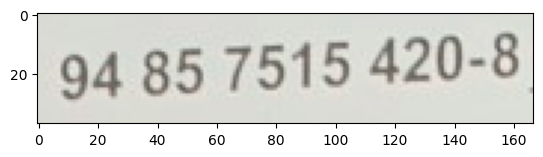

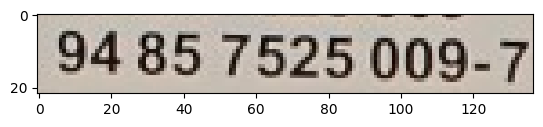

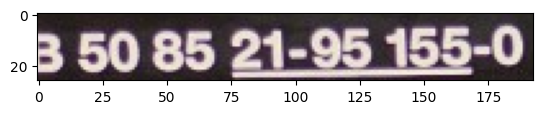

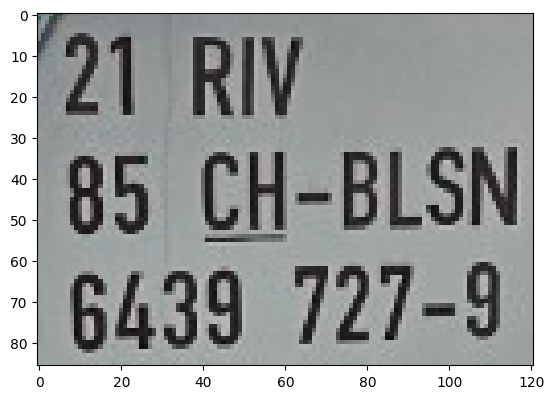

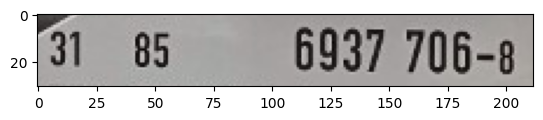

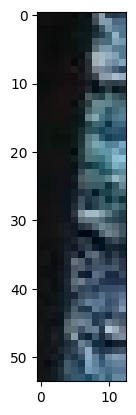

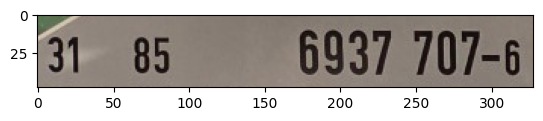

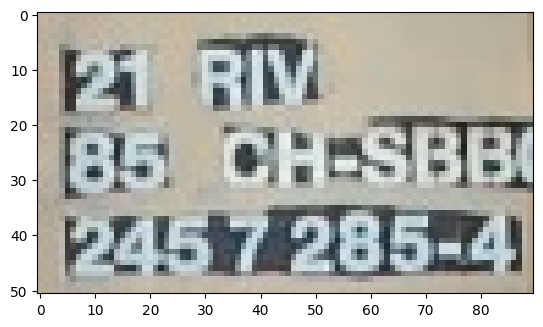

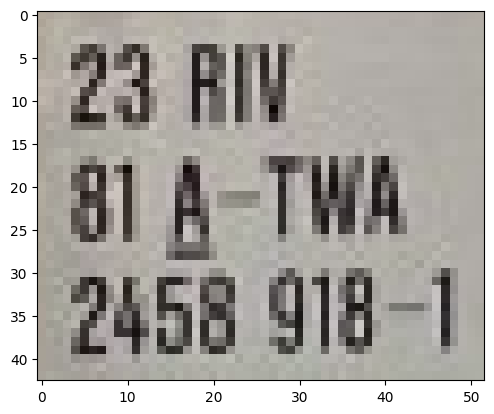

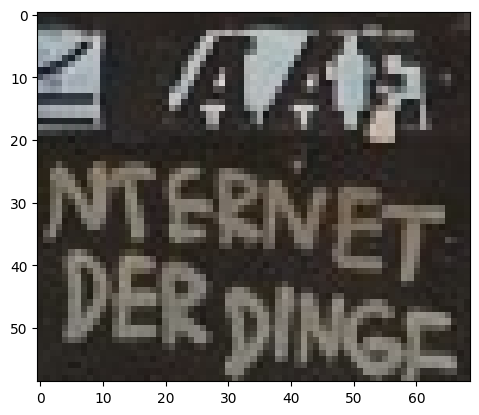

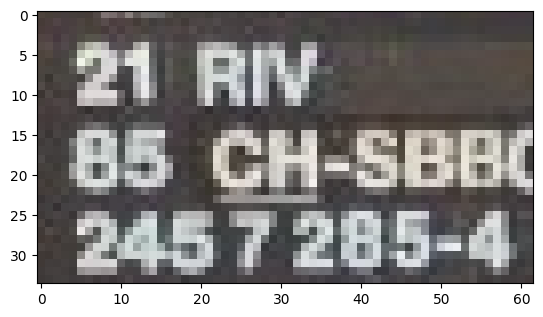

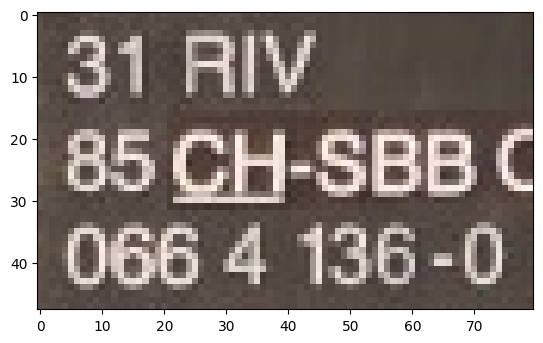

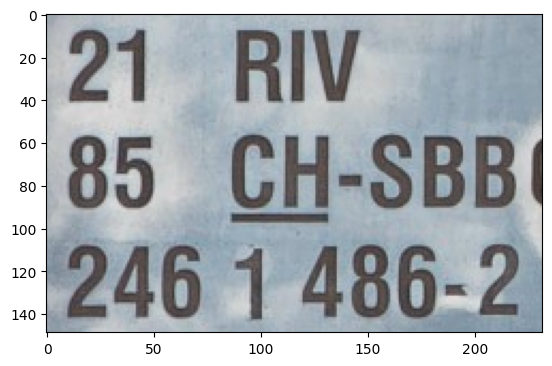

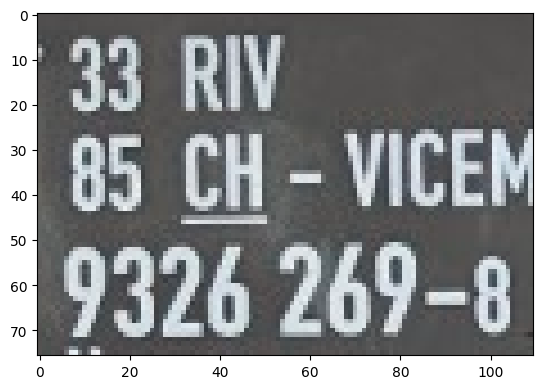

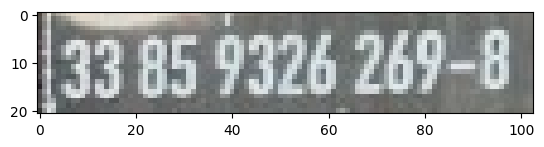

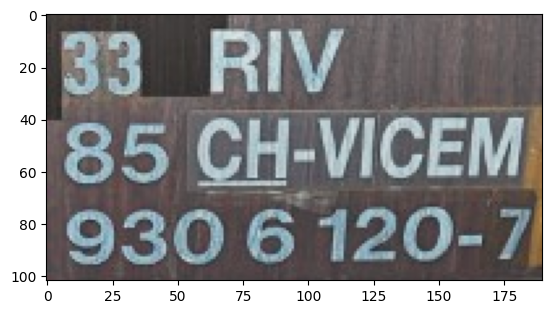

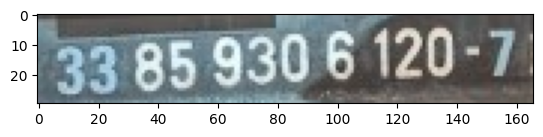

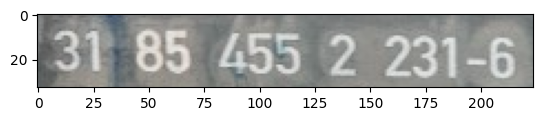

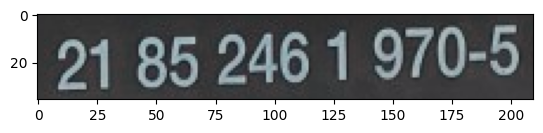

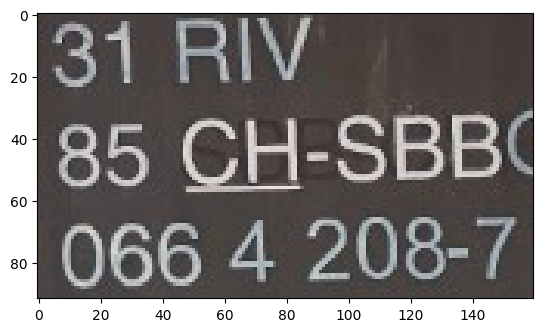

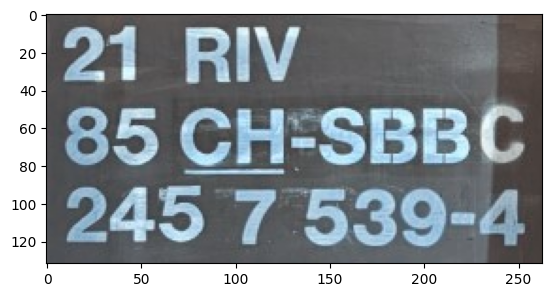

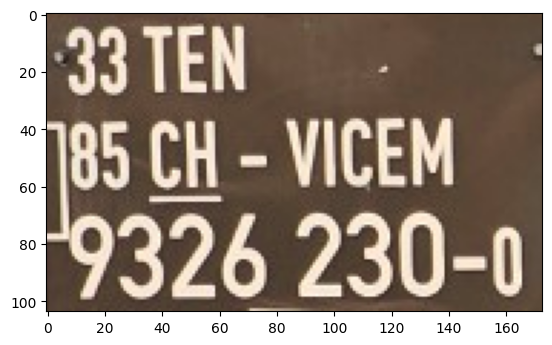

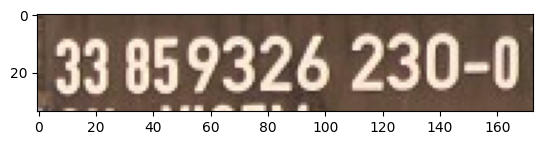

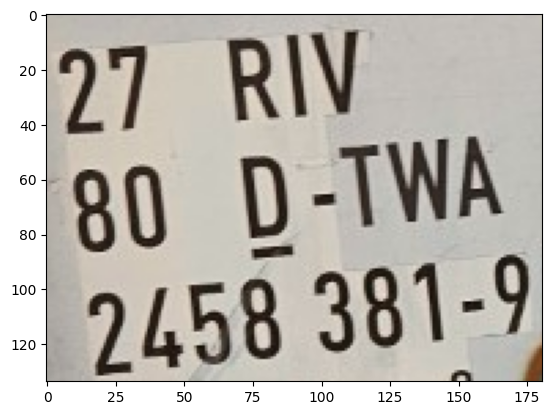

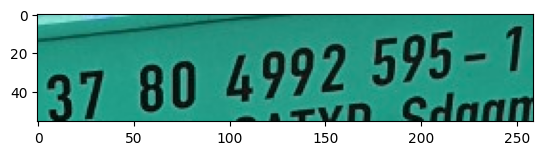

In [12]:
#iterate througt results
for r in results:
    img = r.orig_img

    # Extract bounding boxes
    boxes = r.boxes.xyxy.tolist()

    # Iterate through the bounding boxes
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box
        # Crop the object using the bounding box coordinates
        ultralytics_crop_object = img[int(y1):int(y2), int(x1):int(x2)]
        # Plot croped image
        plt.imshow(ultralytics_crop_object)
        plt.show()

In [ ]:
#super sad, cv2.imshow is not working in colab. Thats why workaround is needed
#for r in results:
#        cv2.imshow('YOLO', np.squeeze(r.plot()))

for r in results:
  plt.imshow(np.squeeze(r.plot()))
  plt.show()

In [20]:
videoPath = '/content/drive/MyDrive/Colab_Notebooks/Data/Video/480p.mp4'
#results = model(source = videoPath, save = True, stream = True)

In [ ]:
model.predict('/content/drive/MyDrive/Colab_Notebooks/Data/Video/full.mp4', save=True, imgsz=1280, augment = True, conf = 0.1)

In [ ]:
!ffmpeg -i {"runs/detect/predict/full.avi"} -vcodec libx264 {"final2.mp4"}

In [22]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('final2.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Neuer Abschnitt